# Physiological Data Feature Extraction & Visualization
Discussion link: https://docs.google.com/document/d/1m-8euIMRwthBe2-fu-KlSa1ggrE0Q0AF5cHe-bxAlTQ/edit?tab=t.0

In [8]:
import os
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

%cd ../child-mind-institute-problematic-internet-use/

data = pd.read_csv("train.csv")
weekday_dic = {
    1: "Mon", 2: "Tues", 3: "Wed", 4: "Thurs", 5: "Fri", 6: "Sat", 7: "Sun"
}


c:\Users\NanaChang\OneDrive\文件\UCSD\ECE 225A\project_visuazlization\child-mind-institute-problematic-internet-use


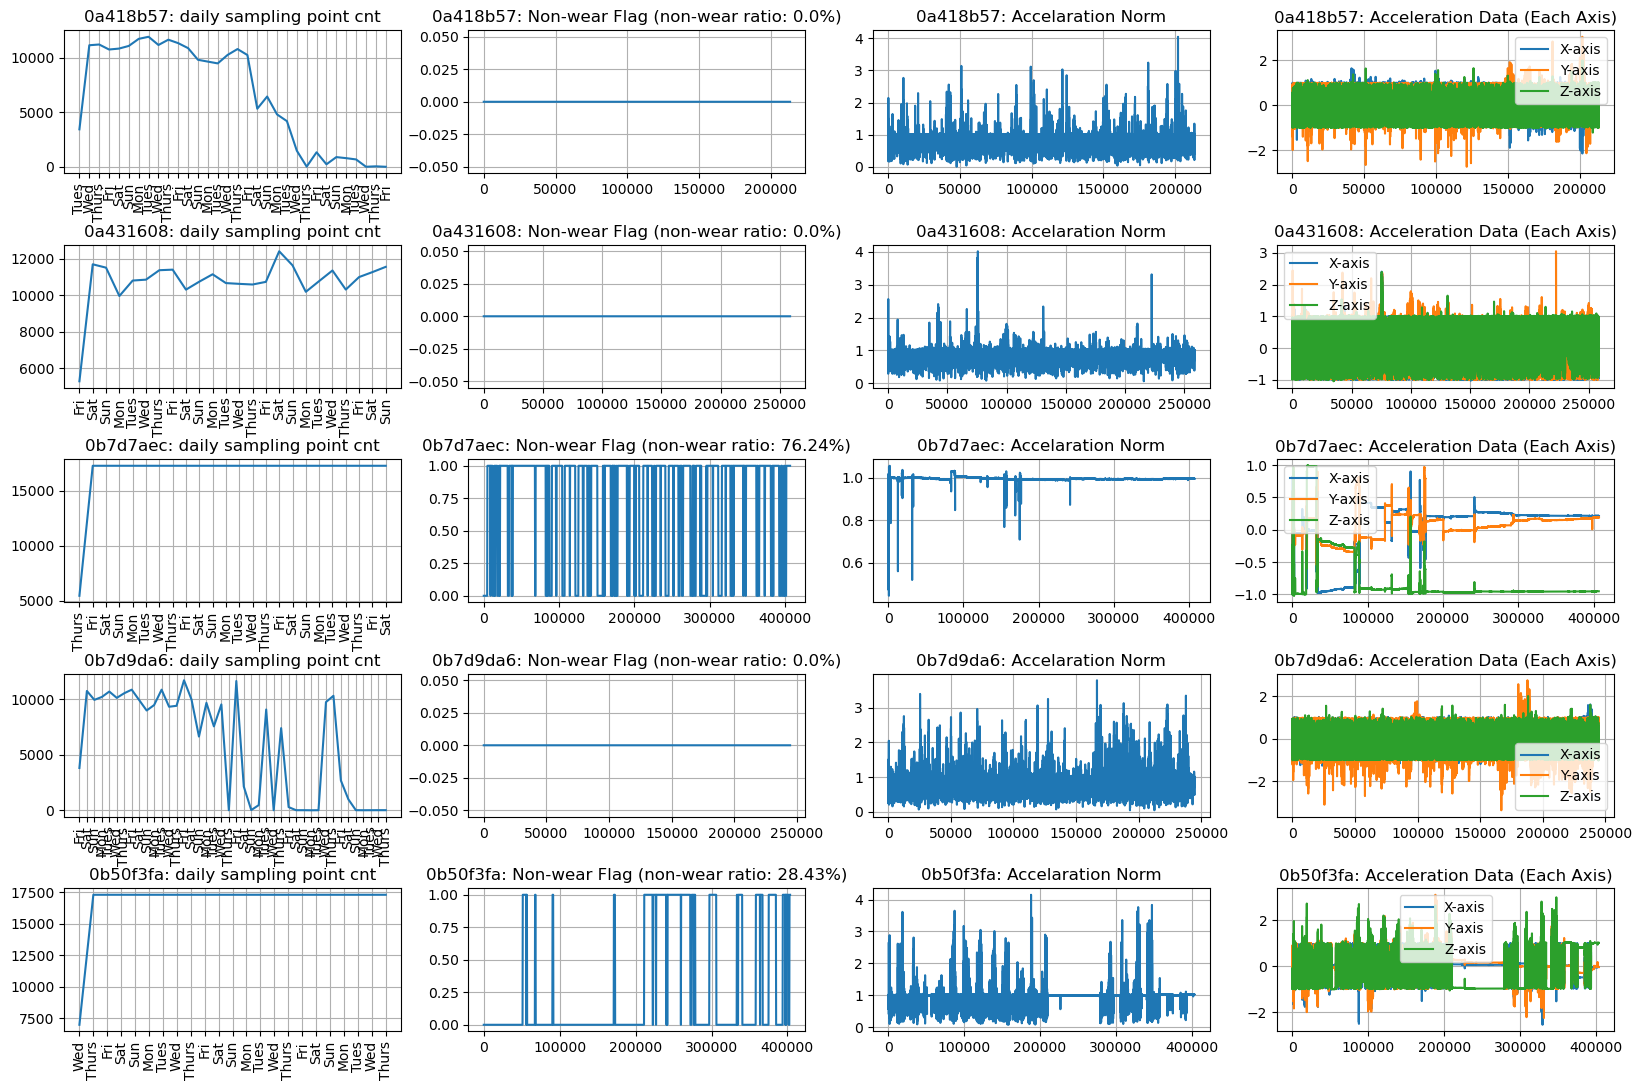

In [3]:
# A brief plotout for the first 5 ids
id_lst = ["0a418b57", "0a431608", "0b7d7aec", "0b7d9da6", "0b50f3fa"]

plt.figure(figsize=(20, 13))
plot_feat_cnt = 4
for iid, id in enumerate(id_lst):
    parq = pd.read_parquet('series_train.parquet/id=' + id + '/part-0.parquet', engine='pyarrow')

    # Plot daily sampling point cnt
    wd = parq["weekday"]
    cnt = 0
    day_pt_cnt = []
    day_pt = []
    for idx in range(len(wd) - 1):
        if wd[idx] != wd[idx + 1]:
            day_pt_cnt.append(cnt)
            day_pt.append(weekday_dic[wd[idx]])
            cnt = 0
        else:
            cnt += 1
    plt.subplot(len(id_lst), plot_feat_cnt, 1 + iid * plot_feat_cnt)
    plt.plot(day_pt_cnt)
    plt.xticks(np.arange(len(day_pt_cnt)), day_pt, rotation=90)
    plt.title(id + ": daily sampling point cnt")
    plt.grid()

    # Plot non-wear flag
    plt.subplot(len(id_lst), plot_feat_cnt, 2 + iid * plot_feat_cnt)
    plt.plot(parq["non-wear_flag"])
    non_wear_ratio = sum(parq["non-wear_flag"]) / len(parq["non-wear_flag"])
    plt.title(id + ": Non-wear Flag (non-wear ratio: " + str(int(non_wear_ratio * 10000) / 100) + "%)")
    plt.grid()

    # Plot norm of acceleration
    plt.subplot(len(id_lst), plot_feat_cnt, 3 + iid * plot_feat_cnt)
    acc_norm = [np.sqrt(parq["X"][n] ** 2 + parq["Y"][n] ** 2 + parq["Z"][n] ** 2)for n in range(len(parq["X"]))]
    plt.plot(acc_norm)
    plt.grid()
    plt.title(id + ": Accelaration Norm")

    # Plot each axis of Acceleration
    plt.subplot(len(id_lst), plot_feat_cnt, 4 + iid * plot_feat_cnt)
    plt.plot(parq["X"], label="X-axis")
    plt.plot(parq["Y"], label="Y-axis")
    plt.plot(parq["Z"], label="Z-axis")
    plt.legend()
    plt.grid()
    plt.title(id + ": Acceleration Data (Each Axis)")

plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()
    

In [4]:
display(parq)

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT
0,0,0.384598,0.134338,-0.406567,0.126038,-32.815197,0.0,0.500000,4184.000000,51540000000000,3,3,5.0
1,1,0.081003,0.259415,-0.637409,0.178854,-44.905285,0.0,23.750000,4183.583496,51545000000000,3,3,5.0
2,2,0.130430,0.833096,-0.165822,0.096469,-10.014885,0.0,17.388889,4183.166504,51550000000000,3,3,5.0
3,3,0.008432,0.915147,-0.071681,0.030005,-5.111357,0.0,11.027778,4182.750000,51555000000000,3,3,5.0
4,4,0.123432,0.000093,-0.897821,0.168413,-71.257744,0.0,4.666667,4182.333496,51560000000000,3,3,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403495,403495,-0.033750,-0.029995,1.018944,0.019951,87.370834,1.0,0.000000,3099.416748,81815000000000,5,4,28.0
403496,403496,-0.033815,-0.029801,1.019087,0.020090,87.399330,1.0,0.000000,3099.333252,81820000000000,5,4,28.0
403497,403497,-0.033893,-0.029917,1.018996,0.020005,87.391754,1.0,0.000000,3099.250000,81825000000000,5,4,28.0
403498,403498,-0.033608,-0.029724,1.019009,0.020013,87.401703,1.0,0.000000,3099.166748,81830000000000,5,4,28.0


## Feature Parsing & Visualization

996


<Axes: >

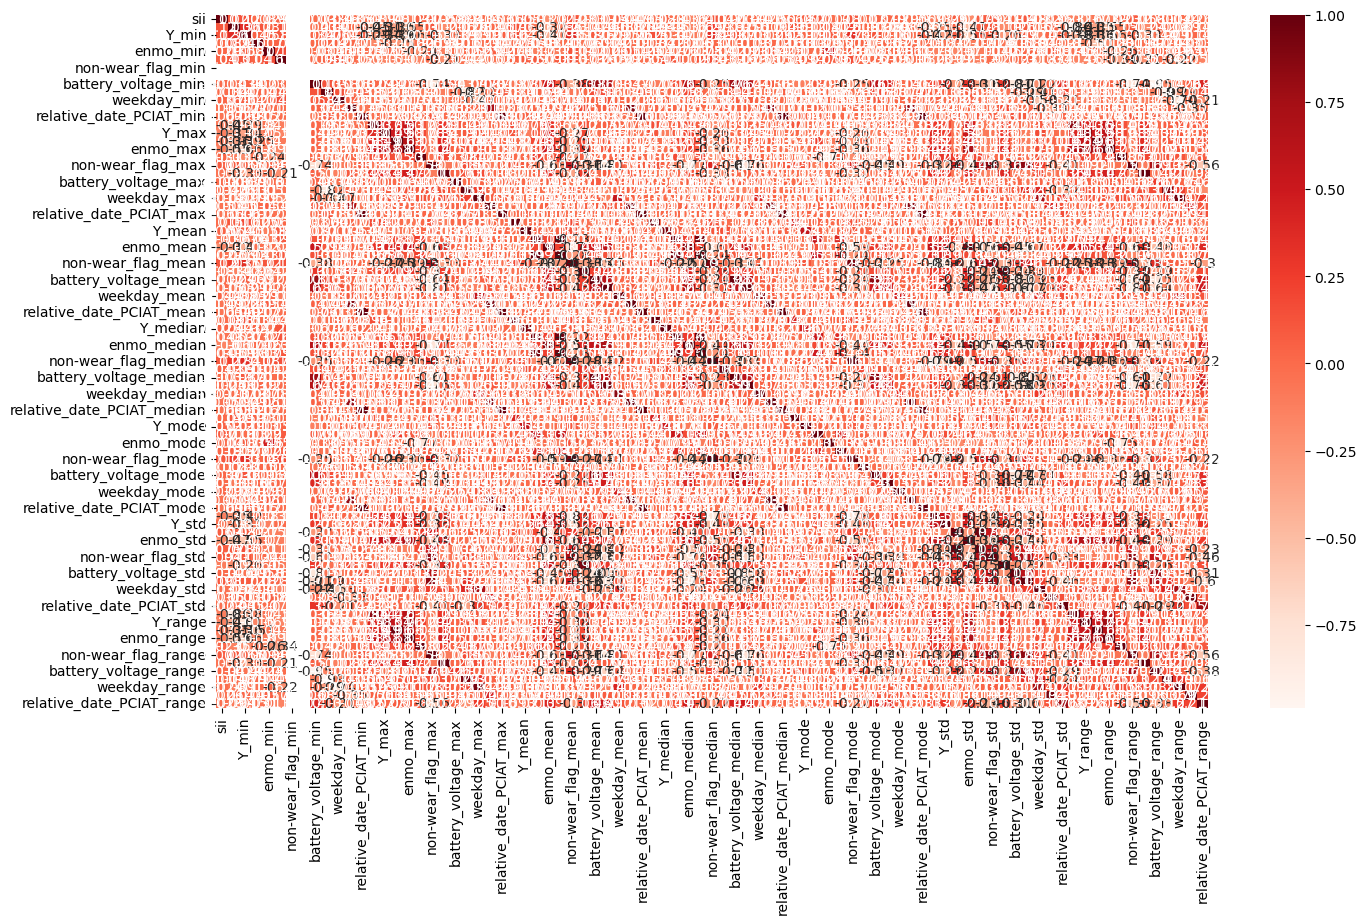

In [ ]:
# Read statistic Features
stat_feat_filename = "../Project_225A/phy_stat_overall.csv"

if os.path.exists(stat_feat_filename):
    stat_feat = pd.read_csv(stat_feat_filename)
else:
    # Read from parsed phy_stat.csv
    stat_feat = []

    for folder in os.listdir("series_train.parquet"):
        if folder.startswith("id="):
            id = folder[3:]
            if os.path.exists('series_train.parquet/id=' + id + "/phy_stat.csv"):
                phy_stat = pd.read_csv('series_train.parquet/id=' + id + "/phy_stat.csv")
                feat_list = list(phy_stat.columns)
                stat_feat.append([phy_stat[featname][0] for featname in feat_list])
    stat_feat = pd.DataFrame(stat_feat, columns=feat_list)
    # Save to csv
    stat_feat.to_csv(stat_feat_filename, index=False)

stat_feat.drop("id", axis=1, inplace=True)

# # Modify Sii into 2 categories
# for i in range(len(stat_feat)):
#     if stat_feat["sii"][i] >= 1:
#         stat_feat["sii"][i] = 1
#     else:
#         stat_feat["sii"][i] = 0

# # Remove data with non-wear ratio being too high
# stat_feat = stat_feat[stat_feat.loc[:, "non_wear_ratio"].between(0, .8, inclusive="both")]

corr = stat_feat.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

<Axes: >

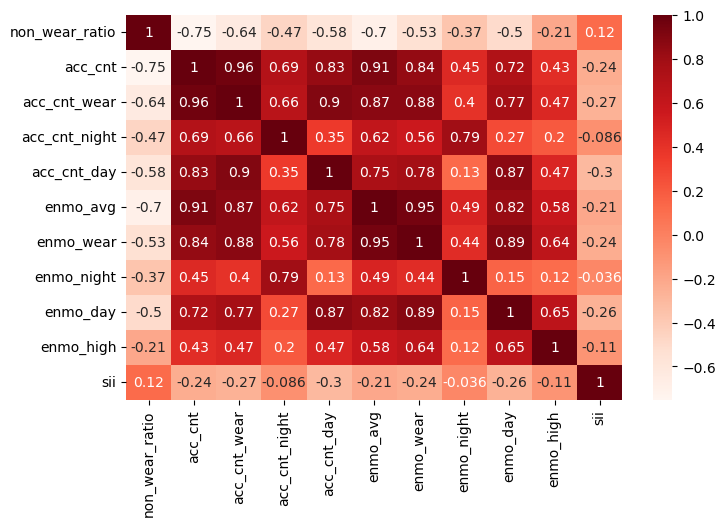

In [ ]:
# Read other features
other_feat_filename = "../Project_225A/phy_other_overall.csv"

if os.path.exists(other_feat_filename):
    other_feat = pd.read_csv(stat_feat_filename)
else:
    other_feat = []
    feat_list = ["id", "non_wear_ratio", 
                "acc_cnt", "acc_cnt_wear", "acc_cnt_night", "acc_cnt_day", 
                "enmo_avg", "enmo_wear", "enmo_night", "enmo_day", "enmo_high",
                "sii"]
    for folder in os.listdir("series_train.parquet"):
        if folder.startswith("id="):
            id = folder[3:]
            if os.path.exists('series_train.parquet/id=' + id + "/phy_feat.csv"):
                phy_feat = pd.read_csv('series_train.parquet/id=' + id + "/phy_feat.csv")
                other_feat.append([phy_feat[featname][0] for featname in feat_list])
    other_feat = pd.DataFrame(other_feat, columns=feat_list)
    other_feat.to_csv(other_feat_filename, index=False)

# # Modify Sii into 2 categories
# for i in range(len(other_feat)):
#     if other_feat["sii"][i] >= 1:
#         other_feat["sii"][i] = 1
#     else:
#         other_feat["sii"][i] = 0

# # Remove data with non-wear ratio being too high
# other_feat = other_feat[other_feat.loc[:, "non_wear_ratio"].between(0, .8, inclusive="both")]

other_feat.drop("id", axis=1, inplace=True)

corr = other_feat.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

In [ ]:
print(len(stat_feat))
print(len(other_feat))  

996
972


## Statistic Feature Extraction

In [7]:
# Physiological Data Statistic
import scipy.stats as stats
stat_list = ["min", "max", "mean", "median", "mode", "std", "range"]

for folder in tqdm(os.listdir("series_train.parquet")):
    if folder.startswith("id="):
        id = folder[3:]
        if os.path.exists('series_train.parquet/id=' + id + "/phy_stat.csv"):
            phy_stat = pd.read_csv('series_train.parquet/id=' + id + "/phy_stat.csv")
            flg = True
            
        else:
            try:
                sii = int(data.loc[data["id"] == id]["sii"])

                phy_stat = pd.DataFrame.from_dict({"id": [id], 
                                                   "sii": [sii]})
                flg = True
            except:
                flg = False
        if flg:
            parq = pd.read_parquet('series_train.parquet/id=' + id + '/part-0.parquet', engine='pyarrow')
            parq.drop("step", axis=1, inplace=True)
            for stat_name in stat_list:
                for entry_name in parq.columns:
                    feat = entry_name + "_" + stat_name
                    if not feat in phy_stat.columns:
                        if stat_name == "min":
                            phy_stat[feat] = [np.amin(parq[entry_name])]
                        elif stat_name == "max":
                            phy_stat[feat] = [np.amax(parq[entry_name])]
                        elif stat_name == "std":
                            phy_stat[feat] = [np.std(parq[entry_name])]
                        elif stat_name == "mean":
                            phy_stat[feat] = [np.mean(parq[entry_name])]
                        elif stat_name == "median":
                            phy_stat[feat] = [np.median(parq[entry_name])]
                        elif stat_name == "mode":
                            m = stats.mode(parq[entry_name])
                            phy_stat[feat] = [stats.mode(parq[entry_name]).mode]
                        elif stat_name == "range":
                            phy_stat[feat] = [np.amax(parq[entry_name]) - np.amin(parq[entry_name])]                
            phy_stat.to_csv('series_train.parquet/id=' + id + "/phy_stat.csv", index=False)

100%|██████████| 996/996 [00:58<00:00, 16.89it/s]


## Other Feature Extraction

In [ ]:
def parq2feature(parq, featname, phy_feat={}):
    if featname == "non_wear_ratio":
        # non_wear_ratio
        phy_feat[featname] = [sum(parq["non-wear_flag"]) / len(parq["non-wear_flag"])]
    elif featname.startswith("acc_cnt"):
        # Activity Count
        acc_norm = [np.sqrt(parq["X"][n] ** 2 + parq["Y"][n] ** 2 + parq["Z"][n] ** 2) for n in range(len(parq["X"]))]
        
        phy_feat["acc_cnt"] = [np.average([np.abs(np.array(acc_norm) - 1)])]
        
        # acc_cnt_wear
        acc_norm_total = 0
        acc_norm_pt_cnt = 0
        for i in range(len(parq["X"])):
            if parq["non-wear_flag"][i] == 0:
                acc_norm_total += np.abs(acc_norm[i] - 1)
                acc_norm_pt_cnt += 1
        phy_feat["acc_cnt_wear"] = [acc_norm_total / acc_norm_pt_cnt]
        
        # Night Activity Count
        acc_norm_total = 0
        acc_norm_pt_cnt = 0
        for i in range(len(parq["time_of_day"])):
            if parq["time_of_day"][i] > 23 * 60 * 60 * 1000000000 or parq["time_of_day"][i] < 4 * 60 * 60 * 1000000000:
                if parq["non-wear_flag"][i] == 0:
                    acc_norm_total += np.abs(acc_norm[i] - 1)
                    acc_norm_pt_cnt += 1
        phy_feat["acc_cnt_night"] = [acc_norm_total / acc_norm_pt_cnt]

        # Daytime Activity Count
        acc_norm_total = 0
        acc_norm_pt_cnt = 0
        for i in range(len(parq["time_of_day"])):
            if parq["time_of_day"][i] > 8 * 60 * 60 * 1000000000 and parq["time_of_day"][i] < 18 * 60 * 60 * 1000000000:
                if parq["non-wear_flag"][i] == 0:
                    acc_norm_total += np.abs(acc_norm[i] - 1)
                    acc_norm_pt_cnt += 1
        phy_feat["acc_cnt_day"] = [acc_norm_total / acc_norm_pt_cnt]
        
    elif featname == "enmo_night":
        # enmo_night
        enmo_total = 0
        enmo_cnt = 0
        for i in range(len(parq["X"])):
            if parq["non-wear_flag"][i] == 0:
                if parq["time_of_day"][i] > 23 * 60 * 60 * 1000000000 or parq["time_of_day"][i] < 4 * 60 * 60 * 1000000000:
                    enmo_total += parq["enmo"][i]
                    enmo_cnt += 1
        phy_feat["enmo_night"] = [enmo_total / enmo_cnt]
        
    elif featname.startswith("enmo"):
        phy_feat["enmo_avg"] = [np.average(parq["enmo"])]
        
        # enmo_wear
        enmo_total = 0
        enmo_cnt = 0
        for i in range(len(parq["X"])):
            if parq["non-wear_flag"][i] == 0:
                enmo_total += parq["enmo"][i]
                enmo_cnt += 1
        phy_feat["enmo_wear"] = [enmo_total / enmo_cnt]

        # enmo_night
        enmo_total = 0
        enmo_cnt = 0
        for i in range(len(parq["X"])):
            if parq["non-wear_flag"][i] == 0:
                if parq["time_of_day"][i] > 23 * 60 * 60 * 1000000000 or parq["time_of_day"][i] < 4 * 60 * 60 * 1000000000:
                    enmo_total += parq["enmo"][i]
                    enmo_cnt += 1
        phy_feat["enmo_night"] = [enmo_total / enmo_cnt]

        # enmo_day
        enmo_total = 0
        enmo_cnt = 0
        for i in range(len(parq["X"])):
            if parq["non-wear_flag"][i] == 0:
                if parq["time_of_day"][i] > 8 * 60 * 60 * 1000000000 and parq["time_of_day"][i] < 18 * 60 * 60 * 1000000000:
                    enmo_total += parq["enmo"][i]
                    enmo_cnt += 1
        phy_feat["enmo_day"] = [enmo_total / enmo_cnt]

        # enmo_high
        enmo_high_cnt = 0
        enmo_cnt = 0
        for i in range(len(parq["X"])):
            if parq["non-wear_flag"][i] == 0:
                enmo_cnt += 1
                if parq["enmo"][i] > 2:
                    enmo_high_cnt += 1
        phy_feat["enmo_high"] = [enmo_high_cnt / enmo_cnt]

    return phy_feat

In [ ]:
# Make phsiological data feature
X = []
y = []
ids = []
feat_list = ["non_wear_ratio", 
             "acc_cnt", "acc_cnt_wear", "acc_cnt_night", "acc_cnt_day", 
             "enmo_avg", "enmo_wear", "enmo_night", "enmo_day", "enmo_high"]

for folder in tqdm(os.listdir("series_train.parquet")):
    if folder.startswith("id="):
        id = folder[3:]
        if os.path.exists('series_train.parquet/id=' + id + "/phy_feat.csv"):
            phy_feat = pd.read_csv('series_train.parquet/id=' + id + "/phy_feat.csv")
            for featname in feat_list:
                if not featname in phy_feat.columns:
                    parq = pd.read_parquet('series_train.parquet/id=' + id + '/part-0.parquet', engine='pyarrow')
                    parq2feature(parq, featname, phy_feat)
            if phy_feat["enmo_night"][0] == 0.0118010098965682:
                parq = pd.read_parquet('series_train.parquet/id=' + id + '/part-0.parquet', engine='pyarrow')
                parq2feature(parq, "enmo_night", phy_feat)
            phy_feat.to_csv('series_train.parquet/id=' + id + "/phy_feat.csv", index=False)
        else:
            try:
                sii = int(data.loc[data["id"] == id]["sii"])
                phy_feat = pd.DataFrame.from_dict({"id": [id], 
                                                   "sii": [sii]})
                for featname in feat_list:
                    if not featname in phy_feat.columns:
                        parq = pd.read_parquet('series_train.parquet/id=' + id + '/part-0.parquet', engine='pyarrow')
                        parq2feature(parq, featname, phy_feat)
                phy_feat.to_csv('series_train.parquet/id=' + id + "/phy_feat.csv", index=False)
            except:
                pass
